<a href="https://colab.research.google.com/github/ShareAndShine/Lemalabs/blob/main/Linear_Regression_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = '/gdrive/My Drive/Online_ML : Aug 2021/Assignments/data/'

In [5]:
raw_data = pd.read_csv(path+'chennai_house_multivariate_train.csv');
#raw_data = pd.read_csv(path+'chennai_house_multivariate_test.csv');
raw_data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1,1,1,1,1,1,2,1,4.0,3.9,4.9,380000,144400,7600000
1,2,1986,26,2,1,2,0,1,1,1,4,4.9,4.2,2.5,760122,304049,21717770
2,1,909,70,1,1,1,1,1,2,1,5,4.1,3.8,2.2,421094,92114,13159200
3,7,1855,14,3,2,0,0,3,3,2,3,4.7,3.9,3.6,356321,77042,9630290
4,4,1226,84,1,1,1,1,3,1,1,2,3.0,2.5,4.1,237000,74063,7406250


In [6]:
data = (raw_data - raw_data.mean()) / (raw_data.max() - raw_data.min())
data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


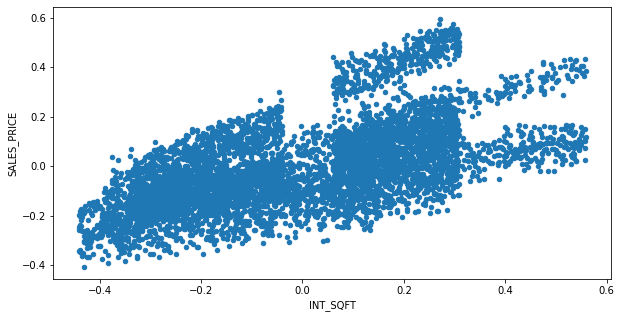

In [7]:
data.plot(kind='scatter', x='INT_SQFT',y='SALES_PRICE',figsize=(10,5))

In [8]:
data.shape

(5999, 17)

In [9]:
data.insert(0,'Ones',1)
data.head()

,Ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,1,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,1,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,1,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [10]:
cols = data.shape[1] # gives you total column size. In our case raw data has  17 columns 
print(cols)
x = data.iloc[:, 0:cols-1] # scan all rows and columns until 16 (contains all inputs params) 
y = data.iloc[:, cols-1:cols] #scan all rows and column 17 (contains output price)

18


In [11]:
x.shape, y.shape

((5999, 17), (5999, 1))

In [12]:
print(x) # all input data in x
print(y) # output price in y

      Ones  AreaCode  INT_SQFT  ...  QS_BEDROOM   REG_FEE    COMMIS
0        1  0.018003 -0.188889  ...    0.473190  0.002950  0.007290
1        1 -0.315330  0.302356  ...   -0.326810  0.419410  0.332871
2        1 -0.481997 -0.236413  ...   -0.426810  0.047972 -0.099340
3        1  0.518003  0.236824  ...    0.039857 -0.022993 -0.130078
4        1  0.018003 -0.077834  ...    0.206523 -0.153721 -0.136153
...    ...       ...       ...  ...         ...       ...       ...
5994     1 -0.315330  0.225818  ...   -0.026810  0.403396  0.562416
5995     1 -0.148664 -0.162376  ...    0.206523 -0.123196  0.024428
5996     1  0.018003 -0.255423  ...   -0.060143 -0.072004 -0.101859
5997     1 -0.148664 -0.268929  ...    0.506523 -0.144238 -0.130638
5998     1 -0.315330  0.179795  ...    0.173190  0.420102  0.341773

[5999 rows x 17 columns]
      SALES_PRICE
0       -0.153105
1        0.503216
2        0.105336
3       -0.058719
4       -0.162112
...           ...
5994     0.512926
5995    -0.032

In [13]:
# Separate train and test input & output from multivariate train file

from sklearn.model_selection import train_test_split #use this lib to split records into train and test and use it for model prediction accuracy. This is a general appraoch followed in ML
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=2) # test_size = 0.25 is used to take 25% of overall data for testing. random_state will pick random rows for test and train
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((4499, 17), (1500, 17), (4499, 1), (1500, 1))

In [14]:
# With all inputs
#x = np.matrix(x) # create matrix for all inputs
#y = np.matrix(y) # create matrix for prize

# With train data  
x = np.matrix(x_train) # create matrix for all inputs
y = np.matrix(y_train) # create matrix for prize


theta_temp = np.zeros((1, 17)) # 1 row and 17 columns (basically input params) and load zeros to beign with.TODO: change hardcoded data with logic to find rows and col size
theta = np.matrix(theta_temp)  # create matrix

In [15]:
#print(theta)
#print(theta.shape)
#print(theta.T)
x.shape, y.shape, theta.shape, theta.T.shape

((4499, 17), (4499, 1), (1, 17), (17, 1))

In [16]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2) 
  return np.sum(inner)/(2 * len(x))

In [17]:
computeError(x,y,theta)

0.014966735368854567

In [18]:
learn_rate = 1 
iters = 600
def gradientDescent(x,y,theta,learn_rate,iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = theta.shape[1] 

  cost = []
  for i in range(iters):
    #print(x*theta.T)
    error = (x * theta.T) -y 
    #print("Printing Error !!!!")
    #print(error) 
    for j in range(parameters):
      #print("I am inside j")
      #print(x[:,j])
      gradient = np.multiply(error, x[:,j])
      #print(gradient)
      temp[0,j] = theta[0,j] - ( (learn_rate/len(x)) * np.sum(gradient))
      #print(temp[0,j])
    
    theta = temp
    cost_iter = computeError(x,y,theta)
    cost.append(cost_iter)
 
  return theta, cost

In [19]:
new_theta,cost = gradientDescent(x,y,theta, learn_rate, iters)

In [20]:
print(new_theta.shape)
print(cost)

(1, 17)
[0.011244259062844016, 0.008708223665909502, 0.006958575191668612, 0.005738772299868832, 0.004879682955578987, 0.00426842404307502, 0.0038288648974992875, 0.0035091994093260307, 0.003273895879241361, 0.0030984112135830776, 0.0029656803616990375, 0.0028637623252046793, 0.002784248864391488, 0.0027211812964455886, 0.0026703086696323805, 0.0026285769598894376, 0.002593775579271872, 0.0025642915853256515, 0.002538937984608522, 0.0025168332381281014, 0.0024973162988170166, 0.0024798864078792466, 0.002464160213487381, 0.00244984105898974, 0.002436696857024849, 0.002424544048213485, 0.002413235892111122, 0.0024026538582124658, 0.0023927012471522437, 0.002383298425528748, 0.0023743792354173343, 0.0023658882646641673, 0.0023577787523608364, 0.0023500109665165092, 0.0023425509355206064, 0.002335369446858481, 0.0023284412494308667, 0.002321744412345571, 0.0023152598050315766, 0.002308970672264769, 0.0023028622841057282, 0.0022969216454824296, 0.002291137253666856, 0.0022854988945247706, 0

In [21]:
model_price = x * new_theta.T
print(model_price)
print(model_price.shape)

[[-0.1589964 ]
 [-0.04796496]
 [-0.02966356]
 ...
 [-0.14148152]
 [-0.10237566]
 [ 0.26606986]]
(4499, 1)


*PLOT* BWN COST AND NUMBER OF ITERATIONS

Text(0.5, 1.0, 'Error vs Iterations')

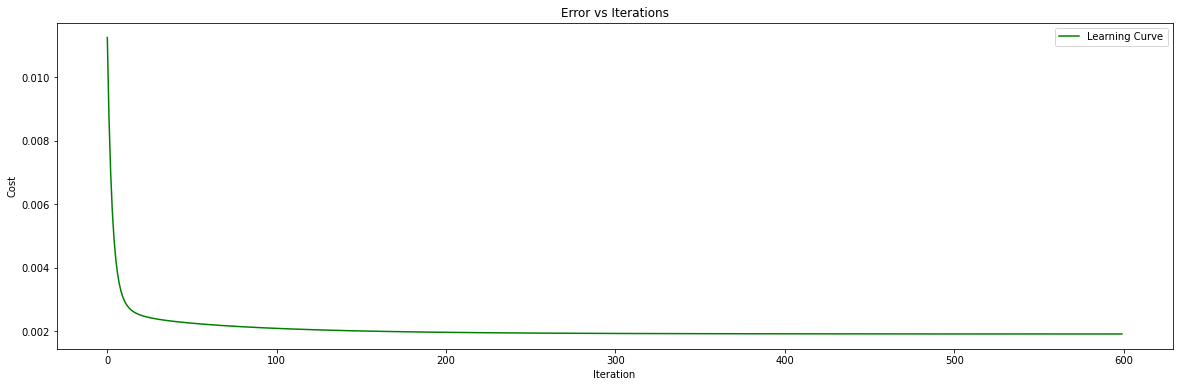

In [22]:
fig,ax = plt.subplots(figsize=(20,6))
ax.plot(np.arange(iters),cost,'g',label="Learning Curve")
ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')

Computation of Error and Accuracy

In [23]:
def calcualteErrorAndAccuracy(modelprice,y):  
  #print(modelprice.shape)
  #print(y.shape)
  #print("Printing model price:: {}".format(model_price))
  #print("Printing y the actual price:: {}".format(y))
  from sklearn.metrics import mean_absolute_error
  Error = mean_absolute_error(modelprice,y) # Check model price as aganist the original price so u will know how much new price is accurate  
  Accuracy = 1 - Error
  print("Printing Error with no rounding {}".format(Error))
  print("Error  with format(round((Error*100),2))) :: {}".format(round((Error*100),2)))
  print("Accuracy - {}".format(round((Accuracy*100),2)))
  return Accuracy

In [24]:
Accuracy = calcualteErrorAndAccuracy(model_price,y)

Printing Error with no rounding 0.04972292926984936
Error  with format(round((Error*100),2))) :: 4.97
Accuracy - 95.03


In [25]:
def predict(new_theta, accuracy):
    #get input from user
    size = float(input('Please enter the size of the house in sqft::'))
    #size = 1500 #input("Please enter the size of the house in sqft::")

    #mean normalize the user data as we have normalized raw data to scale between -1 to 1
    size = (size - raw_data.INT_SQFT.mean()) / (raw_data.INT_SQFT.max() - raw_data.INT_SQFT.min())

    #apply the model
    price = (new_theta[0,0] + new_theta[0,1] * size)

    #predicted price i.e reverse normalize so u can show user in the format that he understands. In our case it will be in lakhs
    predicted_price = (price * (raw_data.SALES_PRICE.max() - raw_data.SALES_PRICE.min())) + (raw_data.SALES_PRICE.mean())

    #calculate the price with max accuracy as we have seen new model price is not 100% accuracy . In our case accuracy is 99.06%
    #hence calcuate max accuracy 
    price_at_max_accuracy = (predicted_price * (1 / accuracy) )
    price_range = price_at_max_accuracy - predicted_price

    return predicted_price, price_range


In [26]:
#size = raw_input("Enter something!!!")
#print(size)

predicted_price, price_range = predict(new_theta, Accuracy)
print('Your house cost is ' + str(round(predicted_price * (1 / 100000),2)) + ' Lakhs')
print('with a variation in range -  ' + str(round(price_range,2)) + ' Thousands')

Please enter the size of the house in sqft::1500
Your house cost is 108.19 Lakhs
with a variation in range -  566101.13 Thousands


LOAD TEST DATA

In [27]:
test_path = '/gdrive/My Drive/Online_ML : Aug 2021/Assignments/data/'
test_raw_data = pd.read_csv(path+'chennai_house_multivariate_test.csv');
test_raw_data.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,5,2497,197,4,2,0,1,3,1,1,5,2.0,2.4,4.7,445401,301723,14367780
1,4,1265,55,1,1,1,0,2,3,0,5,3.8,3.0,3.3,242471,103916,6927750
2,2,1769,28,1,1,2,1,3,2,1,6,3.8,3.7,2.1,418558,294541,15502160
3,6,1902,21,2,1,2,1,3,3,0,4,4.5,2.2,3.6,427193,124024,13780420
4,5,1895,63,3,2,0,0,1,3,1,6,3.5,3.1,4.8,551971,340923,16234440


In [28]:
test_raw_data.shape,theta.shape,new_theta.shape

((1104, 17), (1, 17), (1, 17))

USE THETA VALUES FROM ABOVE AND FIND ACCURACY WITH TEST DATA

In [29]:
test_data = (test_raw_data - test_raw_data.mean()) / (test_raw_data.max() - test_raw_data.min())
test_data.head()
test_data.insert(0,'Ones',1)
test_data.head()


,Ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.166818,0.556007,0.484982,0.781401,0.793478,-0.420743,0.511775,0.495471,-0.641757,-0.024457,0.127717,-0.486534,-0.375423,0.395622,0.079494,0.339589,0.170484
1,1,0.000151,-0.059993,-0.225018,-0.218599,-0.206522,0.079257,-0.488225,-0.004529,0.358243,-0.524457,0.127717,0.113466,-0.175423,-0.071045,-0.149723,-0.081773,-0.195542
2,1,-0.333182,0.192007,-0.360018,-0.218599,-0.206522,0.579257,0.511775,0.495471,-0.141757,-0.024457,0.327717,0.113466,0.057911,-0.471045,0.049174,0.324290,0.226292
3,1,0.333484,0.258507,-0.395018,0.114734,-0.206522,0.579257,0.511775,0.495471,0.358243,-0.524457,-0.072283,0.346800,-0.442089,0.028955,0.058927,-0.038940,0.141588
4,1,0.166818,0.255007,-0.185018,0.448068,0.793478,-0.420743,-0.488225,-0.504529,0.358243,-0.024457,0.327717,0.013466,-0.142089,0.428955,0.199868,0.423092,0.262318


In [30]:
test_data_cols = data.shape[1] # gives you total column size. In our case raw data has  17 columns 
x_test = data.iloc[:, 0:cols-1] # scan all rows and columns until 16 (contains all inputs params) 
y_test = data.iloc[:, cols-1:cols] #scan all rows and column 17 (contains output price)
x_testdata = np.matrix(x) # create matrix for all inputs from test data
y_testdata = np.matrix(y) # create matrix for prize from test data

FIND MODEL PRICE, ERROR & ACCURACY WITH TEST DATA & NEW THETA

In [31]:
#new_theta_from_testdata,cost_testdata = gradientDescent(x_testdata,y_testdata,theta, learn_rate, iters)

model_price_with_testdata = x_testdata * new_theta.T   #use test data inputs and new theta computed with train data
#print(model_price)

calcualteErrorAndAccuracy(model_price_with_testdata,y) # compute accuracy as aganist train data output

Printing Error with no rounding 0.04972292926984936
Error  with format(round((Error*100),2))) :: 4.97
Accuracy - 95.03


0.9502770707301507

**PREDICT PRICE FOR A GIVEN INPUT **

In [32]:
predicted_price_testdata, price_range_testdata = predict(new_theta, Accuracy)
print('Your house cost is ' + str(round(predicted_price_testdata * (1 / 100000),2)) + ' Lakhs')
print('with a variation in range -  ' + str(round(price_range_testdata,2)) + ' Thousands')

Please enter the size of the house in sqft::1500
Your house cost is 108.19 Lakhs
with a variation in range -  566101.13 Thousands
